##### Copyright 2019 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Convolutional Neural Network (CNN)

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/images/cnn">
    <img src="https://www.tensorflow.org/images/tf_logo_32px.png" />
    View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/images/cnn.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />
    Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/images/cnn.ipynb">
    <img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />
    View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/images/cnn.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

This tutorial demonstrates training a simple [Convolutional Neural Network](https://developers.google.com/machine-learning/glossary/#convolutional_neural_network) (CNN) to classify [CIFAR images](https://www.cs.toronto.edu/~kriz/cifar.html). Because this tutorial uses the [Keras Sequential API](https://www.tensorflow.org/guide/keras/overview), creating and training your model will take just a few lines of code.


### Import TensorFlow

In [1]:

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

### Download and prepare the CIFAR10 dataset


The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class. The dataset is divided into 50,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them.

In [2]:
import glob
import matplotlib.pyplot as plt
import random
import pandas as pd
import numpy as np
import seaborn as sns
import os 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from PIL import Image
import math as math

In [3]:
def list2onehot(y, list_classes):
    """
    y = list of class lables of length n
    output = n x k array, i th row = one-hot encoding of y[i] (e.g., [0,0,1,0,0])
    """
    Y = np.zeros(shape = [len(y), len(list_classes)], dtype=int)
    for i in np.arange(Y.shape[0]):
        for j in np.arange(len(list_classes)):
            if y[i] == list_classes[j]:
                Y[i,j] = 1
    return Y

def onehot2list(y, list_classes=None):
    """
    y = n x k array, i th row = one-hot encoding of y[i] (e.g., [0,0,1,0,0])
    output =  list of class lables of length n
    """
    if list_classes is None:
        list_classes = np.arange(y.shape[1])

    y_list = []
    for i in np.arange(y.shape[0]):
        idx = np.where(y[i,:]==1)
        idx = idx[0][0]
        y_list.append(list_classes[idx])
    return y_list


In [4]:
dir = '/Users/jakemarshall/Desktop/Math156 /fire_dataset'
dir_im_fire = dir +'/fire_images/'
dir_im_nonfire = dir +'/non_fire_images/'

lst_fire_img = glob.glob(dir_im_fire + '*.png')
lst_non_fire_img = glob.glob(dir_im_nonfire + '*.png')

In [5]:
#lst_non_fire_img
print ('found ', len(lst_fire_img), ' fire images and ', len(lst_non_fire_img), 'non fire images')

found  730  fire images and  221 non fire images


In [6]:
#print(path_fire_resize + '/*.png')
#print(path_fire_resize )
img_size_x=100 
img_size_y=100 
sub_fol = 'resized'+'_'+str(img_size_x)+'x'+str(img_size_y)
path_fire_resize = dir_im_fire + sub_fol 
path_non_fire_resize = dir_im_nonfire + sub_fol 
lst_fire_img = glob.glob(path_fire_resize + '/*.png')
lst_non_fire_img = glob.glob(path_non_fire_resize + '/*.png')

#lst_non_fire_img
print ('FOUND \n ', len(lst_fire_img), ' fire images in', path_fire_resize ,' and \n ', len(lst_non_fire_img), 'non fire images in ', path_non_fire_resize)

FOUND 
  755  fire images in /Users/jakemarshall/Desktop/Math156 /fire_dataset/fire_images/resized_100x100  and 
  244 non fire images in  /Users/jakemarshall/Desktop/Math156 /fire_dataset/non_fire_images/resized_100x100


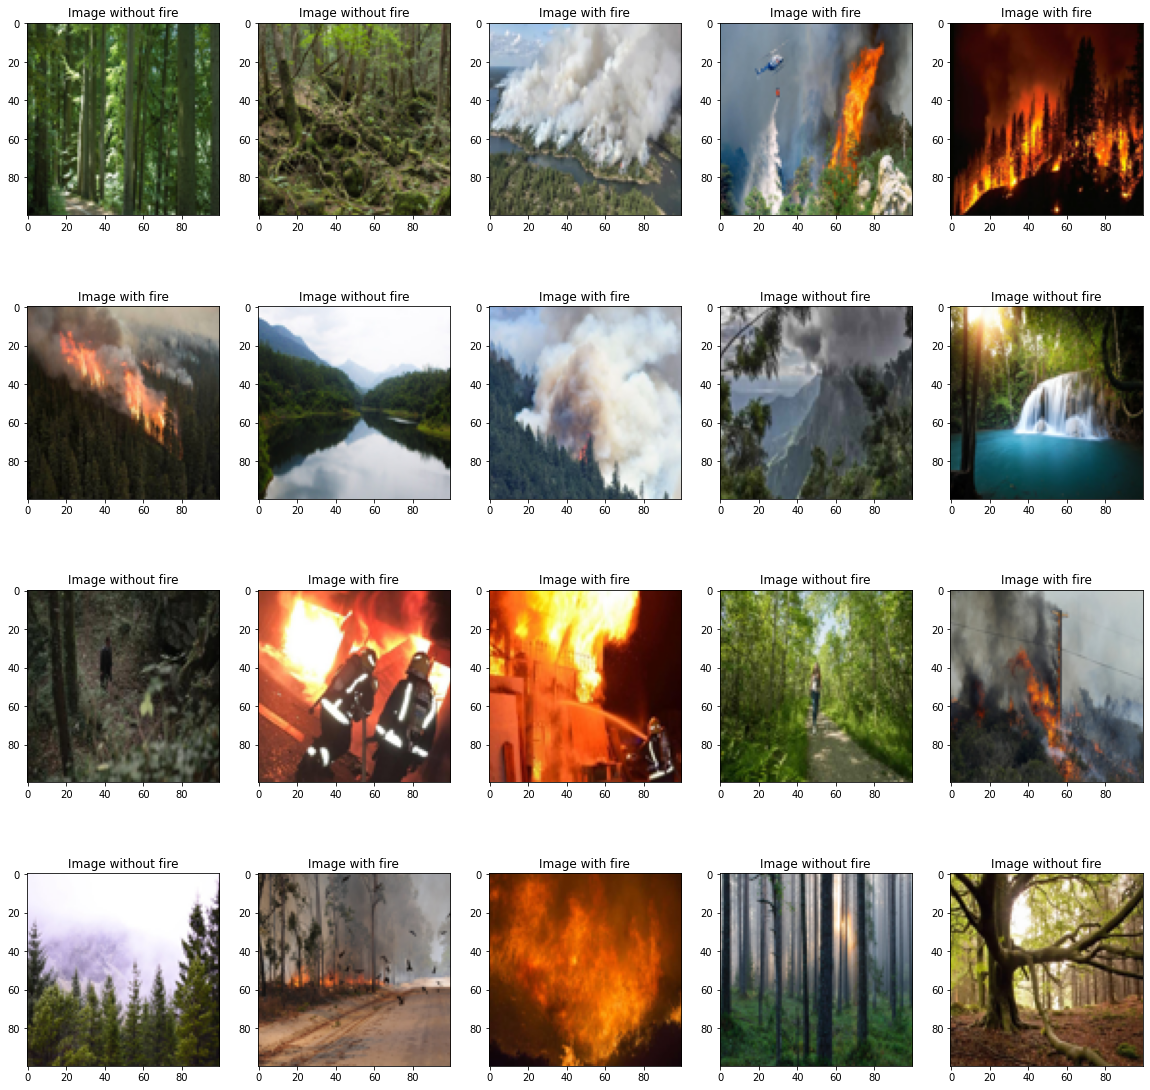

In [7]:
# plot a few random images 


lst_images_random = random.sample(lst_fire_img,10) + random.sample(lst_non_fire_img,10)
random.shuffle(lst_images_random)

plt.figure(figsize = (20,20))

#print(lst_images_random)

for i in range(len(lst_images_random)):
    
    plt.subplot(4,5,i+1)


    if "non_fire" in lst_images_random[i]:
        #img = cv2.imread(lst_images_random[i])
        img = Image.open(lst_images_random[i])
        #img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
        new_img= img.resize((img_size_x,img_size_y))
        plt.imshow(new_img,cmap = 'gray')
        plt.title('Image without fire')
        #print('image name',img)

    else:
        #img = cv2.imread(lst_images_random[i])
        #img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
        #plt.imshow(lst_images_random[i].reshape(28,28))
        img = Image.open(lst_images_random[i])
        plt.imshow(img,cmap = 'gray')
        plt.title("Image with fire")



plt.show()

In [8]:
# create a datafram with all images 

lst_fire = []
for x in lst_fire_img:
  lst_fire.append([x,1])
lst_nn_fire = []
for x in lst_non_fire_img:
  lst_nn_fire.append([x,0])
lst_complete = lst_fire + lst_nn_fire
random.shuffle(lst_complete)


In [9]:
df = pd.DataFrame(lst_complete, columns = ['files','target'])
df.head(10)


,files,target
0,/Users/jakemarshall/Desktop/Math156 /fire_data...,1
1,/Users/jakemarshall/Desktop/Math156 /fire_data...,1
2,/Users/jakemarshall/Desktop/Math156 /fire_data...,1
3,/Users/jakemarshall/Desktop/Math156 /fire_data...,1
4,/Users/jakemarshall/Desktop/Math156 /fire_data...,1
5,/Users/jakemarshall/Desktop/Math156 /fire_data...,0
6,/Users/jakemarshall/Desktop/Math156 /fire_data...,0
7,/Users/jakemarshall/Desktop/Math156 /fire_data...,1
8,/Users/jakemarshall/Desktop/Math156 /fire_data...,1
9,/Users/jakemarshall/Desktop/Math156 /fire_data...,1


appending image... 0
appending image... 50
appending image... 100
appending image... 150
appending image... 200
appending image... 250
appending image... 300
appending image... 350
appending image... 400
appending image... 450
appending image... 500
appending image... 550
appending image... 600
appending image... 650
appending image... 700
appending image... 750
appending image... 800
appending image... 850
appending image... 900
appending image... 950
shape of pic  (100, 100, 3)
shape of x  (990, 100, 100, 3)
990
y.shape (990,)


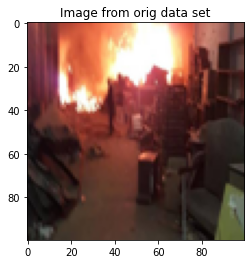

'\nEach row of X is a vectorization of an image of img_size_x x img_size_y x 3 pixels.  \nThe corresponding row of y holds the true class label from {0,1}\n'

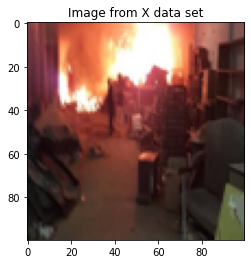

In [10]:
Y = []
X= []
for i in range(len(lst_complete)):
#for i in range(10):
        if (i%50) == 0: print('appending image...', i)
        img = Image.open(lst_complete[i][0])
        pix = np.array(img.getdata())
        #print('shape of pic ', pix.shape)
        #print('pix dhape)', (pix.flatten()).shape)
        #pix = np.array(img.getdata()).flatten()
        if pix.shape == (10000, 3):
            pix1 = pix.reshape(100,100,3)
            X.append(pix1)
            Y.append(lst_complete[i][1])
        

print('shape of pic ', pix1.shape)

#X = np.transpose(X)
#X = np.transpose(X)
X = np.array(X)
Y = np.array(Y)
print('shape of x ', X.shape)

#transform the images into an array X and Y so they can be used as input to the ML algos

print(len(X))
#print(X[7,:])
#print('X.shape', X.shape)
print('y.shape', Y.shape)


# plot random image from the original data set 
img = Image.open(lst_complete[7][0])
pix = np.array(img.getdata())
flat_list = pix.ravel()
pix = np.array(flat_list).reshape(img_size_x,img_size_y,3)
plt.imshow(pix,cmap = 'gray')
plt.title("Image from orig data set")
plt.show()


# plot random image from X array 
myfile = (X[7])
myi = myfile.reshape(img_size_x, img_size_y, 3)
# print randome image 
plt.imshow(myi,cmap = 'gray')
plt.title("Image from X data set")


'''
Each row of X is a vectorization of an image of img_size_x x img_size_y x 3 pixels.  
The corresponding row of y holds the true class label from {0,1}
'''

Text(0.5, 1.0, 'Image from X data set')

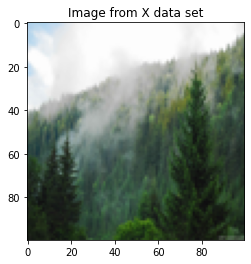

In [11]:



# plot random image from X array 
myfile = (X[567])
myi = myfile.reshape(img_size_x, img_size_y, 3)
# print randome image 
plt.imshow(myi,cmap = 'gray')
plt.title("Image from X data set")

In [12]:
#touple X with Y

#make y one-hot-encoded
# Y01 = list2onehot(Y, [0,1])

#normalize X
X = X/255

print('Y ', Y.shape)
print('X ', X.shape)

X_train = []
X_test = []
y_test = [] # list of one-hot encodings (indicator vectors) of each label  
y_train = [] # list of one-hot encodings (indicator vectors) of each label 

count_bad = []
for i in range(len(Y)):
    
        # for each example i, make it into train set with probabiliy 0.8 and into test set otherwise
        # in each case, ignore X[i] if it isn't the right size (there are 9 images that don't match size)
        U = np.random.rand() # Uniform([0,1]) variable
        if U<0.8:
            X_train.append(X[i])
            y_train.append(Y[i])
        else:
            X_test.append(X[i])
            y_test.append(Y[i])

X_train = np.asarray(X_train)
X_test = np.asarray(X_test)
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

print('ytrain ', y_train.shape)
print('ytest ', y_test.shape)
print('Xtrain ', X_train.shape)
print('Xtest ', X_test.shape)


# ## set size of set for CNN training 
# idx = np.random.choice(np.arange(len(y_train)), 30)
# X_train0 = X_train[idx]
# y_train0 = y_train[idx]


## set size of set for CNN training -- make sure there are enough non-fire (half and half)
num_NF = 180
num_F = 180
count_NF = 0
count_F  = 0
idx = []
for i in range(800):
    
    id = np.random.choice(np.arange(len(y_train)), 1)
    if y_train[id] == 1 and count_NF < num_NF:
        idx.append(id)
        count_NF += 1
    elif y_train[id] == 0 and count_F < num_F:
        idx.append(id)
        count_F += 1

   
idx = np.asarray(idx)
idx = idx.squeeze()
X_train0 = X_train[idx]
y_train0 = y_train[idx]


print('X_train0 ',X_train0.shape)
print('y_train0 ',y_train0.shape)

#====================================================================================
## set size of set for CNN testing -- make sure there are half and half fire/nofire
num_NF = 100
num_F = 100

count_NF = 0
count_F  = 0
idx = []
for i in range(800):
    
    id = np.random.choice(np.arange(len(y_test)), 1)
    if y_test[id] == 1 and count_NF < num_NF:
        idx.append(id)
        count_NF += 1
    elif y_test[id] == 0 and count_F < num_F:
        idx.append(id)
        count_F += 1

   
idx = np.asarray(idx)
idx = idx.squeeze()
X_test0 = X_test[idx]
y_test0 = y_test[idx]

print('X_test0 ',X_test0.shape)
print('y_test0 ',y_test0.shape)


Y  (990,)
X  (990, 100, 100, 3)
ytrain  (800,)
ytest  (190,)
Xtrain  (800, 100, 100, 3)
Xtest  (190, 100, 100, 3)
X_train0  (360, 100, 100, 3)
y_train0  (360,)
X_test0  (200, 100, 100, 3)
y_test0  (200,)


### Verify the data

To verify that the dataset looks correct, let's plot the first 25 images from the training set and display the class name below each image:


### Create the convolutional base

<!-- The 6 lines of code below define the convolutional base using a common pattern: a stack of [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) and [MaxPooling2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D) layers.

As input, a CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size. If you are new to these dimensions, color_channels refers to (R,G,B). In this example, you will configure your CNN to process inputs of shape (32, 32, 3), which is the format of CIFAR images. You can do this by passing the argument `input_shape` to your first layer. -->


In [13]:
model = models.Sequential()
model.add(layers.Conv2D(100, (6, 6), activation='relu', input_shape=(100, 100, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(200, (6, 6), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(200, (6, 6), activation='relu'))

Let's display the architecture of your model so far:

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 95, 95, 100)       10900     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 47, 47, 100)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 42, 42, 200)       720200    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 21, 21, 200)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 200)       1440200   
Total params: 2,171,300
Trainable params: 2,171,300
Non-trainable params: 0
_________________________________________________________________


Above, you can see that the output of every Conv2D and MaxPooling2D layer is a 3D tensor of shape (height, width, channels). The width and height dimensions tend to shrink as you go deeper in the network. The number of output channels for each Conv2D layer is controlled by the first argument (e.g., 32 or 64). Typically,  as the width and height shrink, you can afford (computationally) to add more output channels in each Conv2D layer.

### Add Dense layers on top

To complete the model, you will feed the last output tensor from the convolutional base (of shape (4, 4, 64)) into one or more Dense layers to perform classification. Dense layers take vectors as input (which are 1D), while the current output is a 3D tensor. First, you will flatten (or unroll) the 3D output to 1D,  then add one or more Dense layers on top. CIFAR has 10 output classes, so you use a final Dense layer with 10 outputs.

In [15]:
model.add(layers.Flatten())
model.add(layers.Dense(200, activation='relu'))
model.add(layers.Dense(10))

Here's the complete architecture of your model:

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 95, 95, 100)       10900     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 47, 47, 100)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 42, 42, 200)       720200    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 21, 21, 200)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 200)       1440200   
_________________________________________________________________
flatten (Flatten)            (None, 51200)             0         
_________________________________________________________________
dense (Dense)                (None, 200)               1

The network summary shows that (4, 4, 64) outputs were flattened into vectors of shape (1024) before going through two Dense layers.

### Compile and train the model

In [17]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])



history = model.fit(X_train, y_train, epochs=15, 
                    validation_data=(X_test0, y_test0))

# history = model.fit(train_images, train_labels, epochs=10, 
#                     validation_data=(test_images, test_labels))

Epoch 1/15
25/25 [==============================] - 98s 4s/step - loss: 0.6592 - accuracy: 0.7812 - val_loss: 0.6217 - val_accuracy: 0.9000
Epoch 2/15
25/25 [==============================] - 75s 3s/step - loss: 0.2342 - accuracy: 0.9038 - val_loss: 0.4581 - val_accuracy: 0.9250
Epoch 3/15
25/25 [==============================] - 76s 3s/step - loss: 0.1263 - accuracy: 0.9513 - val_loss: 0.1918 - val_accuracy: 0.9650
Epoch 4/15
25/25 [==============================] - 76s 3s/step - loss: 0.1756 - accuracy: 0.9388 - val_loss: 0.2685 - val_accuracy: 0.8800
Epoch 5/15
25/25 [==============================] - 76s 3s/step - loss: 0.1614 - accuracy: 0.9362 - val_loss: 0.1670 - val_accuracy: 0.9450
Epoch 6/15
25/25 [==============================] - 75s 3s/step - loss: 0.1399 - accuracy: 0.9388 - val_loss: 0.2118 - val_accuracy: 0.9600
Epoch 7/15
25/25 [==============================] - 73s 3s/step - loss: 0.1405 - accuracy: 0.9550 - val_loss: 0.2335 - val_accuracy: 0.9550
Epoch 8/15
25/25 [==

### Evaluate the model

7/7 - 5s - loss: 0.4624 - accuracy: 0.9200


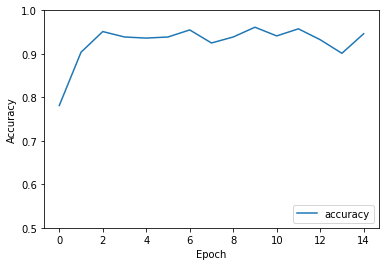

In [63]:
plt.plot(history.history['accuracy'], label='accuracy')
# plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test0,  y_test0, verbose=2)

In [73]:
print('ones ',  np.asarray(np.where(y_test0 == 1)).shape)
print('zeros ', np.asarray(np.where(y_test0 == 0)).shape)

ones  [[  0   1   2   4   6   8   9  10  11  12  13  14  15  16  17  19  20  21
   22  23  24  26  27  28  29  30  33  34  35  36  38  39  40  41  42  43
   44  45  47  49  50  51  52  53  54  55  59  60  62  63  64  65  66  68
   71  73  74  75  76  78  79  80  82  83  85  86  87  88  89  90  91  92
   95  96  97  98  99 100 102 103 105 106 107 109 110 113 114 115 117 121
  122 124 126 129 130 131 132 133 137 139]]
zeros  (1, 100)


Your simple CNN has achieved a test accuracy of over 70%. Not bad for a few lines of code! For another CNN style, check out the [TensorFlow 2 quickstart for experts](https://www.tensorflow.org/tutorials/quickstart/advanced) example that uses the Keras subclassing API and `tf.GradientTape`.